In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plot
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import seaborn as sns 
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from lightgbm import LGBMRegressor
from sklearn import svm
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import GradientBoostingRegressor
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data=pd.read_csv('/content/drive/MyDrive/BitcoinDataset.csv',index_col='Date',parse_dates=True)

In [ ]:
data

,Open,High,Low,Close,Volume,Market Cap
Date,,,,,,
2017-07-31,2763.24,2889.62,2720.61,2875.34,"860,575,000","45,535,800,000"
2017-07-30,2724.39,2758.53,2644.85,2757.18,"705,943,000","44,890,700,000"
2017-07-29,2807.02,2808.76,2692.80,2726.45,"803,746,000","46,246,700,000"
2017-07-28,2679.73,2897.45,2679.73,2809.01,"1,380,100,000","44,144,400,000"
2017-07-27,2538.71,2693.32,2529.34,2671.78,"789,104,000","41,816,500,000"
...,...,...,...,...,...,...
2013-05-02,116.38,125.60,92.28,105.21,-,"1,292,190,000"
2013-05-01,139.00,139.89,107.72,116.99,-,"1,542,820,000"
2013-04-30,144.00,146.93,134.05,139.00,-,"1,597,780,000"


In [ ]:
# converting the string to datetime format
#data['Date'] = pd.to_datetime(data['Date'], infer_datetime_format=True)

In [ ]:
data.shape

(1556, 6)

In [ ]:
data.describe()

,Open,High,Low,Close
count,1556.000000,1556.000000,1556.000000,1556.000000
mean,582.625328,597.992847,567.851446,584.239396
std,523.137312,542.992855,505.877401,525.904442
min,68.500000,74.560000,65.530000,68.430000
25%,254.287500,260.327500,248.835000,254.320000
50%,438.600000,447.560000,430.570000,438.855000
75%,662.437500,674.525000,646.735000,663.402500
max,2953.220000,2999.910000,2840.530000,2958.110000


In [ ]:

data.isna().sum()

Open          0
High          0
Low           0
Close         0
Volume        0
Market Cap    0
dtype: int64

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1556 entries, 2017-07-31 to 2013-04-28
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Open        1556 non-null   float64
 1   High        1556 non-null   float64
 2   Low         1556 non-null   float64
 3   Close       1556 non-null   float64
 4   Volume      1556 non-null   object 
 5   Market Cap  1556 non-null   object 
dtypes: float64(4), object(2)
memory usage: 85.1+ KB


In [ ]:
data.corr()

,Open,High,Low,Close
Open,1.000000,0.998561,0.998157,0.997514
High,0.998561,1.000000,0.997320,0.998596
Low,0.998157,0.997320,1.000000,0.998755
Close,0.997514,0.998596,0.998755,1.000000


In [ ]:
def corrl(data,threshold):
  corr=data.corr()['Market Cap'].sort_values(ascending=False)[1:]
  abs_corr=abs(corr)
  relevant_features=abs_corr[abs_corr>threshold]
  return relevant_features

In [ ]:
#corr_features=corrl(data,0.81)

In [ ]:
dat3=data.copy()

In [ ]:
dff=data.iloc[:,[0,1,2,3]]

In [ ]:
dff

,Open,High,Low,Close
Date,,,,
2017-07-31,2763.24,2889.62,2720.61,2875.34
2017-07-30,2724.39,2758.53,2644.85,2757.18
2017-07-29,2807.02,2808.76,2692.80,2726.45
2017-07-28,2679.73,2897.45,2679.73,2809.01
2017-07-27,2538.71,2693.32,2529.34,2671.78
...,...,...,...,...
2013-05-02,116.38,125.60,92.28,105.21
2013-05-01,139.00,139.89,107.72,116.99
2013-04-30,144.00,146.93,134.05,139.00


#Visualization

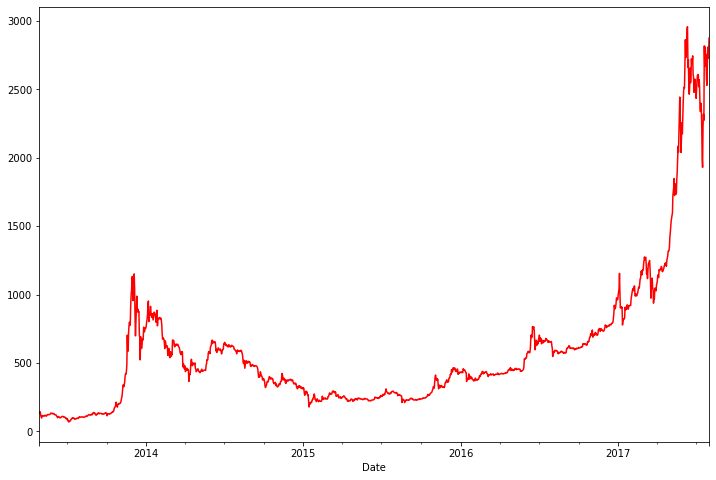

In [ ]:
data['Close'].plot(figsize=(12,8),color='red')
plot.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  """Entry point for launching an IPython kernel.


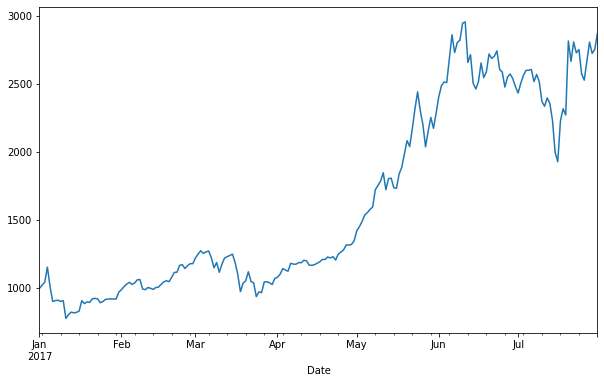

In [ ]:
data['2017']['Close'].plot(figsize=(10,6))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  """Entry point for launching an IPython kernel.


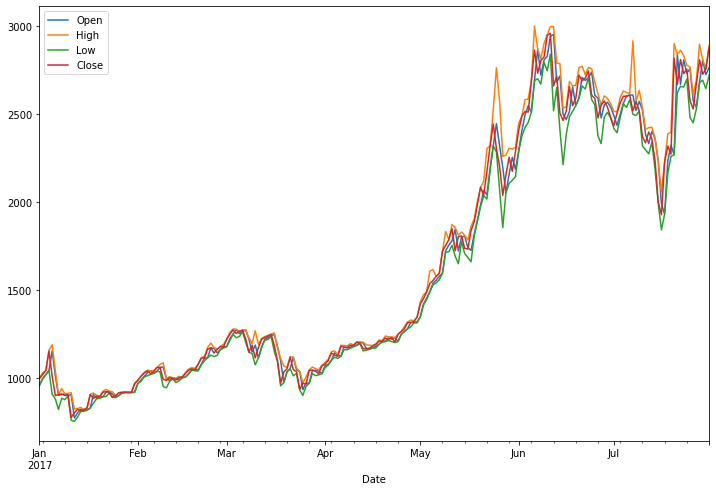

In [ ]:
data['2017'].plot(figsize=(12,8))

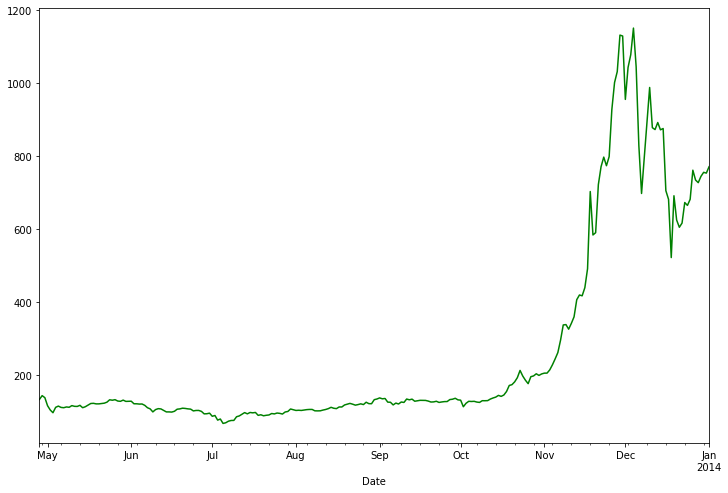

In [ ]:
data['2012':'2014']['Close'].plot(figsize=(12,8),color='green')

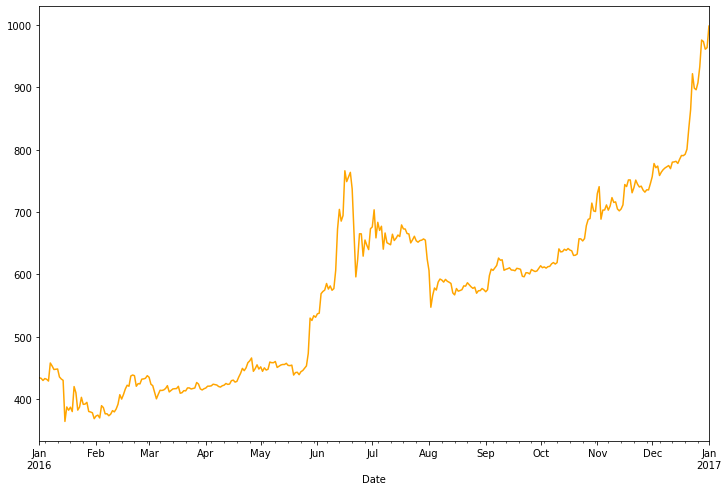

In [ ]:
data['2015':'2017']['Close'].plot(figsize=(12,8),color='orange')

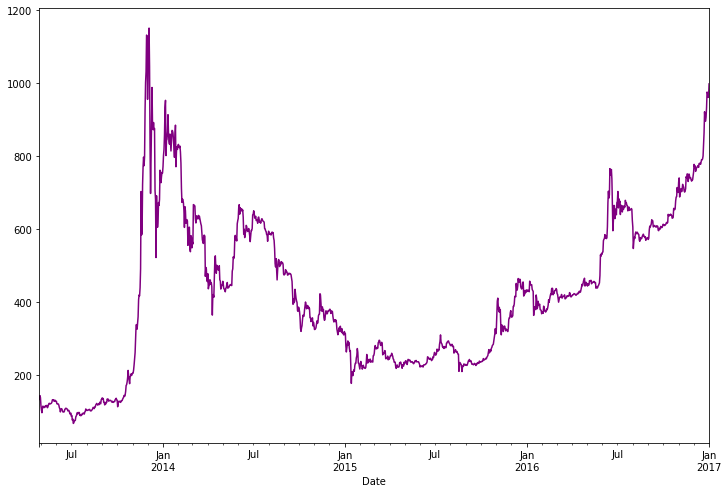

In [ ]:
data['2012':'2017']['Close'].plot(figsize=(12,8),color='purple')

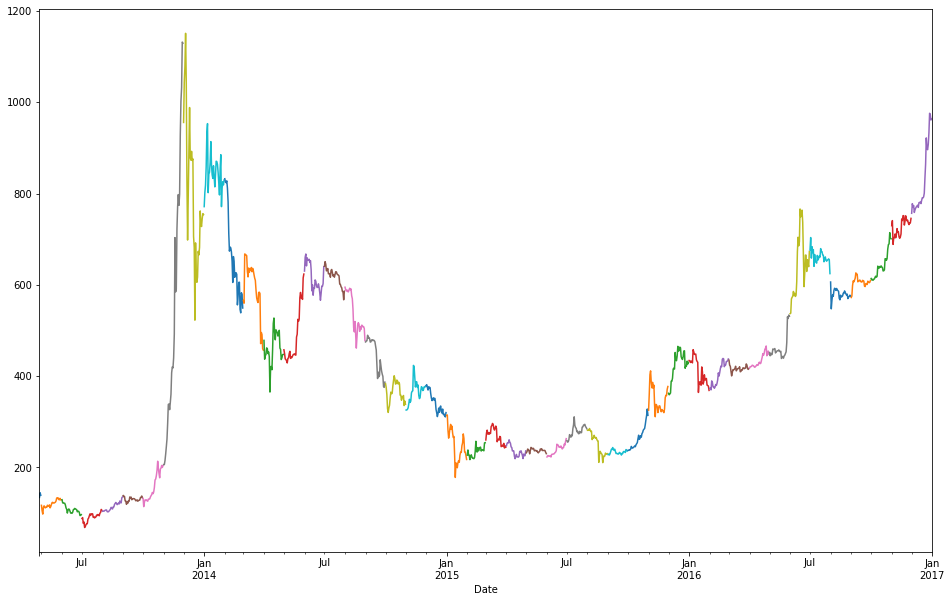

In [ ]:
data.loc['2012':'2017']['Close'].resample('M').plot(figsize=(16,10))
plot.show()

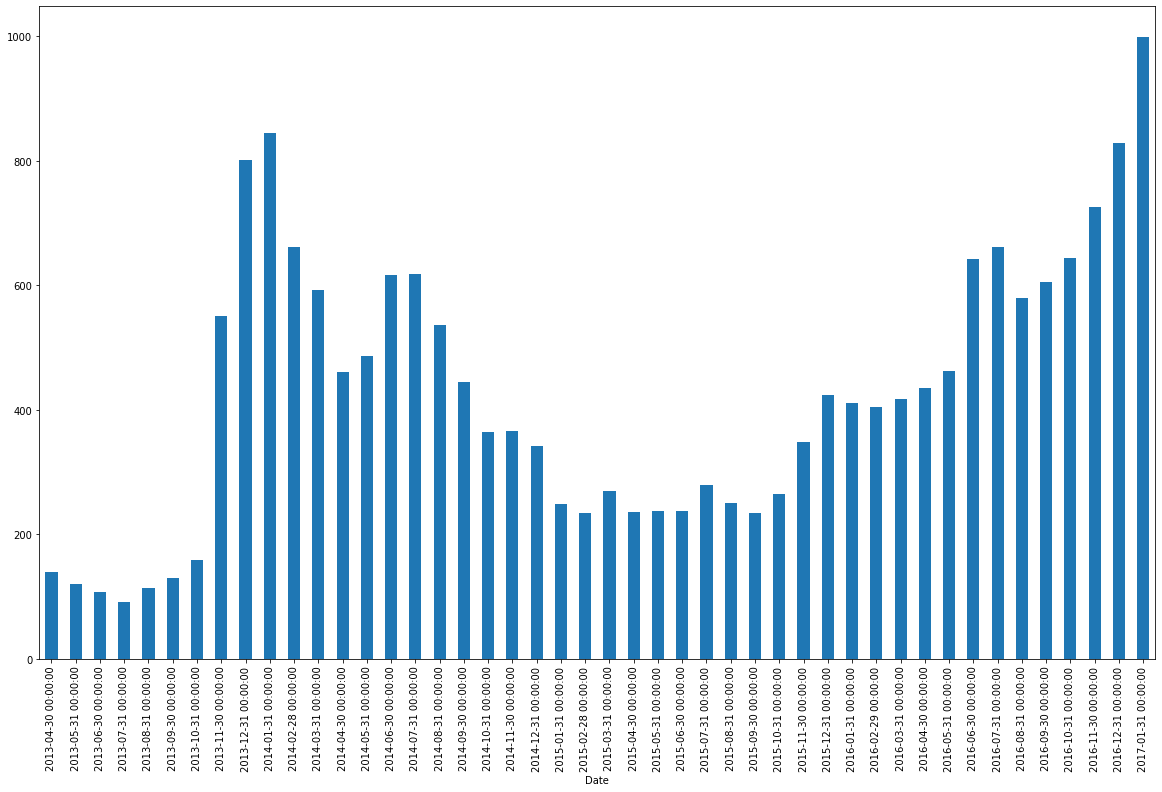

In [ ]:
data.loc['2012':'2017']['Close'].resample('M').mean().plot.bar(figsize=(20,12))
plot.show()

#Split the dataset into train and test sets

In [ ]:
from sklearn.model_selection import train_test_split

X = dff.iloc[:, 0:-1].values
Y = data['Close'].values

X_train, X_test, Y_train,Y_test = train_test_split(X, Y, test_size=.3, random_state=15)

In [ ]:
X_train.shape, X_test.shape, Y_train.shape,Y_test.shape

((1089, 3), (467, 3), (1089,), (467,))

In [ ]:
dff

,Open,High,Low,Close
Date,,,,
2017-07-31,2763.24,2889.62,2720.61,2875.34
2017-07-30,2724.39,2758.53,2644.85,2757.18
2017-07-29,2807.02,2808.76,2692.80,2726.45
2017-07-28,2679.73,2897.45,2679.73,2809.01
2017-07-27,2538.71,2693.32,2529.34,2671.78
...,...,...,...,...
2013-05-02,116.38,125.60,92.28,105.21
2013-05-01,139.00,139.89,107.72,116.99
2013-04-30,144.00,146.93,134.05,139.00


#Creating pipeline and testing the various models

In [ ]:
from sklearn.pipeline import Pipeline


In [ ]:
pipeline_lr=Pipeline([('scalar1',StandardScaler()),('lr_regressor',LogisticRegression(random_state=0))])

pipeline_dt=Pipeline([('scalar2',StandardScaler()),('dt_regressor',DecisionTreeRegressor(max_depth=22))])

pipeline_randomforest=Pipeline([('scalar3',StandardScaler()),('rf_regressor',RandomForestRegressor(n_estimators=700,max_depth=10))])

pipeline_lgbm=Pipeline([('scalar4',StandardScaler()),('lgbm_regressor',LGBMRegressor(n_estimators=2000, eta=0.5,max_depth=3))])

pipeline_knn=Pipeline([('scalar5',StandardScaler()),('knn_model',KNeighborsRegressor(n_neighbors=3))])


In [ ]:
pipeline_mlpRegressor=Pipeline([('scalar7',StandardScaler()),('mlp_regressor',MLPRegressor(hidden_layer_sizes=(8,8,8), activation='relu', solver='adam', max_iter=20))])

pipeline_gradient_boosting_regressor=Pipeline([('scalar8',StandardScaler()),('gradient_boosting_regressor',GradientBoostingRegressor(n_estimators=20, learning_rate=0.1,max_depth=1, random_state=0))])

In [ ]:
## Lets make the list of pipelines
pipelines = [pipeline_lr, pipeline_dt, pipeline_randomforest,pipeline_lgbm,pipeline_mlpRegressor,pipeline_gradient_boosting_regressor]

In [ ]:
best_accuracy=0.0
best_classifier=0
best_pipeline=""

In [ ]:
X_train, Y_train

(array([[236.89, 237.21, 232.46],
        [574.07, 576.28, 573.47],
        [617.34, 619.85, 617.34],
        ...,
        [648.28, 675.26, 646.78],
        [281.44, 294.06, 281.44],
        [ 88.98, 104.  ,  88.17]]),
 array([233.13, 574.11, 619.11, ..., 664.55, 283.68,  93.59]))

In [ ]:
# Dictionary of pipelines and classifier types for ease of reference
pipe_dict = {1: 'Logistic Regression', 2: 'Decision Tree', 3: 'RandomForest', 4: 'Lightgbm', 5: 'MLP', 6: 'Gradient Boosting'}

# Fit the pipelines
for pipe in pipelines:
	pipe.fit(X_train.astype(int), Y_train.astype(int))

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


In [ ]:
for i in pipe_dict:
  print(pipe_dict[i])

Logistic Regression
Decision Tree
RandomForest
Lightgbm
MLP
Gradient Boosting


In [ ]:
l2=[]
for i,model in zip(pipe_dict,pipelines):
  l2.append(model.predict(X_test))
  print()
  print("Predicted values:",pipe_dict[i],'=')
  print(model.predict(X_test))


Predicted values: Logistic Regression =
[ 417  236  236  417  703  236  417  417  417  703  417  236  417  417
  703  703  703  417  417  417  236  703 2601  236  236  236  417  417
  236  417  703  417  417  703  703  417  417  236  417  417  236  236
  703  236  703  703  236  417  417  417  417  703  236  703  417  236
  417  417  417  417  417  236  236  236  236  236  236  236  236  236
  236  236  236  417  417  236  417  236  236  703  236  236  236  236
  703  703  236  236  703  236  236  417 2601 2601  236 2601  236  236
  417  236 2601  703  417  703  703  236  236  236  417  236  236  236
  417  236  236  703  236  703  417  236  417  236  236  703  417  236
  703  236  703  417  703  417  236  236  703  417  417  703  236 2601
  236  417  417  236  417  703  236  236  417  417  703  236  417  236
  703  417  236  417  236  417  417  703 2601  417  236  703  236  236
  236  236  236  236  236  236 2601  417  703  703  921  417  703  417
  236  417  236  703  703  236  236 

In [ ]:
def plot(predict,Y_test):
  plot.figure(figsize=(15, 8))
  test_day = [t for t in range(len(Y_test))]
  labels={'Orginal','Predicted'}
  plot.plot(test_day, predict, color= 'black')
  plot.plot(test_day, Y_test, color = 'red')
  plot.title('Expected Vs Predicted Views Forecasting')
  plot.ylabel('Closing Price')
  plot.legend(labels)
  plot.show()

model: Logistic Regression =
Expected value = 589.37 -------predicted value = 417 -----------error =  29.25 %
model: Logistic Regression =
Expected value = 274.9 -------predicted value = 236 -----------error =  14.15 %
model: Logistic Regression =
Expected value = 247.05 -------predicted value = 236 -----------error =  4.47 %
model: Logistic Regression =
Expected value = 458.6 -------predicted value = 417 -----------error =  9.07 %
model: Logistic Regression =
Expected value = 928.1 -------predicted value = 703 -----------error =  24.25 %
model: Logistic Regression =
Expected value = 178.1 -------predicted value = 236 -----------error =  32.51 %
model: Logistic Regression =
Expected value = 607.96 -------predicted value = 417 -----------error =  31.41 %
model: Logistic Regression =
Expected value = 449.6 -------predicted value = 417 -----------error =  7.25 %
model: Logistic Regression =
Expected value = 581.14 -------predicted value = 417 -----------error =  28.24 %
model: Logistic Re

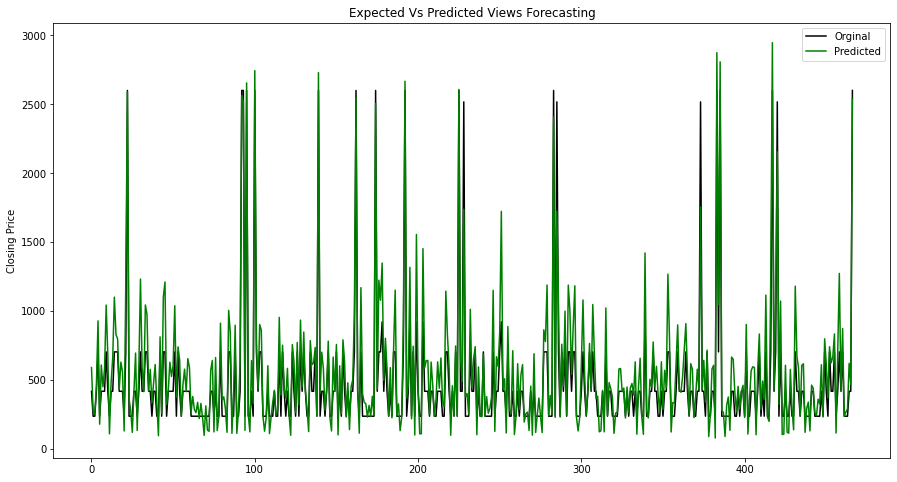

error= 2.428996739284526

model: Decision Tree =
Expected value = 589.37 -------predicted value = 591.0 -----------error =  0.28 %
model: Decision Tree =
Expected value = 274.9 -------predicted value = 282.0 -----------error =  2.58 %
model: Decision Tree =
Expected value = 247.05 -------predicted value = 245.0 -----------error =  0.83 %
model: Decision Tree =
Expected value = 458.6 -------predicted value = 460.0 -----------error =  0.31 %
model: Decision Tree =
Expected value = 928.1 -------predicted value = 893.0 -----------error =  3.78 %
model: Decision Tree =
Expected value = 178.1 -------predicted value = 221.0 -----------error =  24.09 %
model: Decision Tree =
Expected value = 607.96 -------predicted value = 614.0 -----------error =  0.99 %
model: Decision Tree =
Expected value = 449.6 -------predicted value = 450.0 -----------error =  0.09 %
model: Decision Tree =
Expected value = 581.14 -------predicted value = 577.0 -----------error =  0.71 %
model: Decision Tree =
Expected v

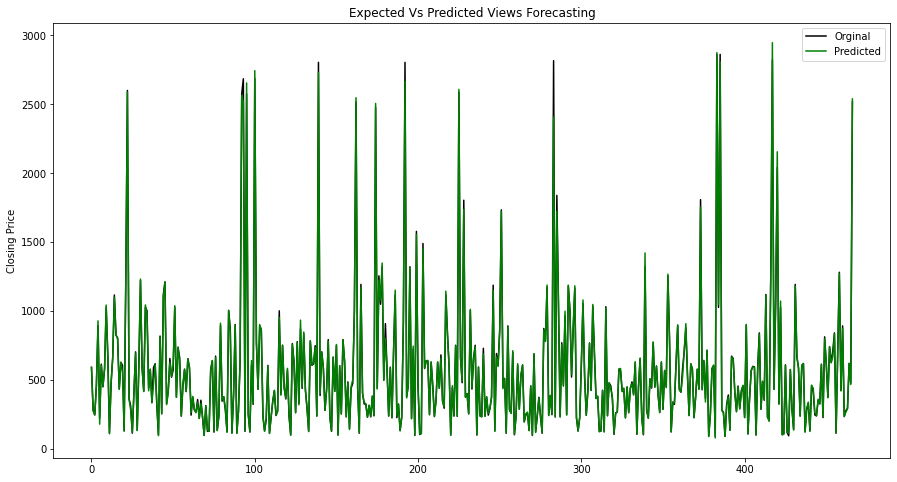

error= 0.839594852165153

model: RandomForest =
Expected value = 589.37 -------predicted value = 590.4183614886531 -----------error =  0.18 %
model: RandomForest =
Expected value = 274.9 -------predicted value = 279.44828004709956 -----------error =  1.65 %
model: RandomForest =
Expected value = 247.05 -------predicted value = 245.15441719641768 -----------error =  0.77 %
model: RandomForest =
Expected value = 458.6 -------predicted value = 458.510040239459 -----------error =  0.02 %
model: RandomForest =
Expected value = 928.1 -------predicted value = 890.1428677592248 -----------error =  4.09 %
model: RandomForest =
Expected value = 178.1 -------predicted value = 206.71015359243927 -----------error =  16.06 %
model: RandomForest =
Expected value = 607.96 -------predicted value = 610.890359695533 -----------error =  0.48 %
model: RandomForest =
Expected value = 449.6 -------predicted value = 449.22458680305544 -----------error =  0.08 %
model: RandomForest =
Expected value = 581.14 --

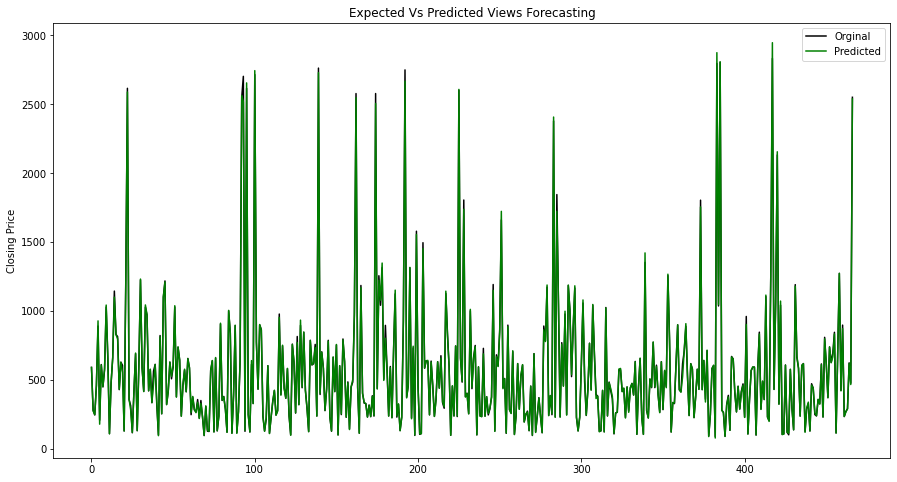

error= 0.4702695416913299

model: Lightgbm =
Expected value = 589.37 -------predicted value = 592.4136374695114 -----------error =  0.52 %
model: Lightgbm =
Expected value = 274.9 -------predicted value = 282.4479581958652 -----------error =  2.75 %
model: Lightgbm =
Expected value = 247.05 -------predicted value = 246.34648342267397 -----------error =  0.28 %
model: Lightgbm =
Expected value = 458.6 -------predicted value = 455.6746133089366 -----------error =  0.64 %
model: Lightgbm =
Expected value = 928.1 -------predicted value = 880.931160468807 -----------error =  5.08 %
model: Lightgbm =
Expected value = 178.1 -------predicted value = 216.65214372490675 -----------error =  21.65 %
model: Lightgbm =
Expected value = 607.96 -------predicted value = 601.110322121433 -----------error =  1.13 %
model: Lightgbm =
Expected value = 449.6 -------predicted value = 451.22270692406215 -----------error =  0.36 %
model: Lightgbm =
Expected value = 581.14 -------predicted value = 575.528527097

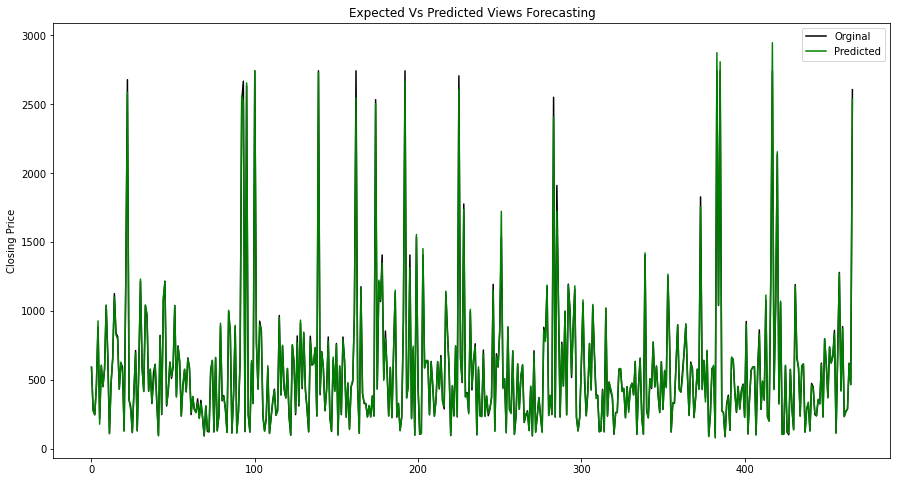

error= 2.6516767295847754

model: MLP =
Expected value = 589.37 -------predicted value = 4.894857943634758 -----------error =  99.17 %
model: MLP =
Expected value = 274.9 -------predicted value = 8.065187100608872 -----------error =  97.07 %
model: MLP =
Expected value = 247.05 -------predicted value = 8.458818237978443 -----------error =  96.58 %
model: MLP =
Expected value = 458.6 -------predicted value = 6.127591073664307 -----------error =  98.66 %
model: MLP =
Expected value = 928.1 -------predicted value = 3.7103764077732073 -----------error =  99.60 %
model: MLP =
Expected value = 178.1 -------predicted value = 8.896511255796502 -----------error =  95.00 %
model: MLP =
Expected value = 607.96 -------predicted value = 4.728532657596348 -----------error =  99.22 %
model: MLP =
Expected value = 449.6 -------predicted value = 6.242563502069935 -----------error =  98.61 %
model: MLP =
Expected value = 581.14 -------predicted value = 5.103263434080844 -----------error =  99.12 %
model

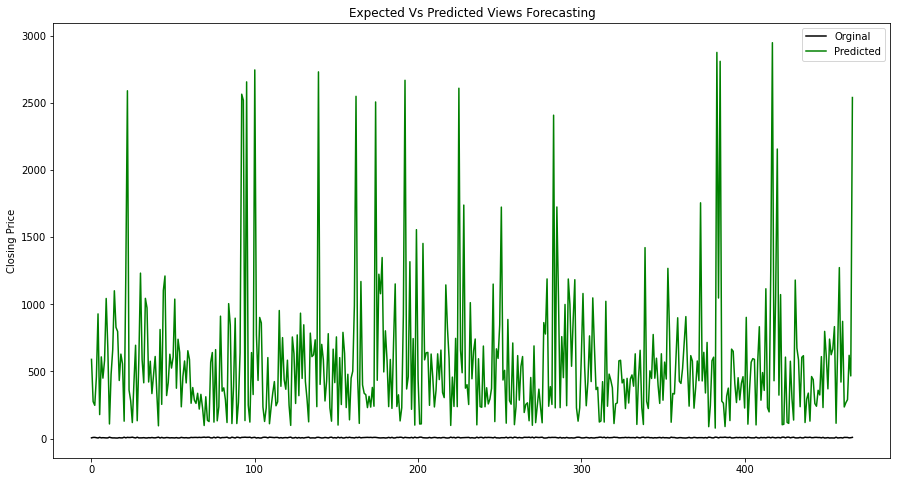

error= 99.66510031830468

model: Gradient Boosting =
Expected value = 589.37 -------predicted value = 559.1155034780647 -----------error =  5.13 %
model: Gradient Boosting =
Expected value = 274.9 -------predicted value = 371.93203164670905 -----------error =  35.30 %
model: Gradient Boosting =
Expected value = 247.05 -------predicted value = 371.93203164670905 -----------error =  50.55 %
model: Gradient Boosting =
Expected value = 458.6 -------predicted value = 431.06402231980076 -----------error =  6.00 %
model: Gradient Boosting =
Expected value = 928.1 -------predicted value = 719.8858166408762 -----------error =  22.43 %
model: Gradient Boosting =
Expected value = 178.1 -------predicted value = 371.93203164670905 -----------error =  108.83 %
model: Gradient Boosting =
Expected value = 607.96 -------predicted value = 559.1155034780647 -----------error =  8.03 %
model: Gradient Boosting =
Expected value = 449.6 -------predicted value = 431.06402231980076 -----------error =  4.12 %
m

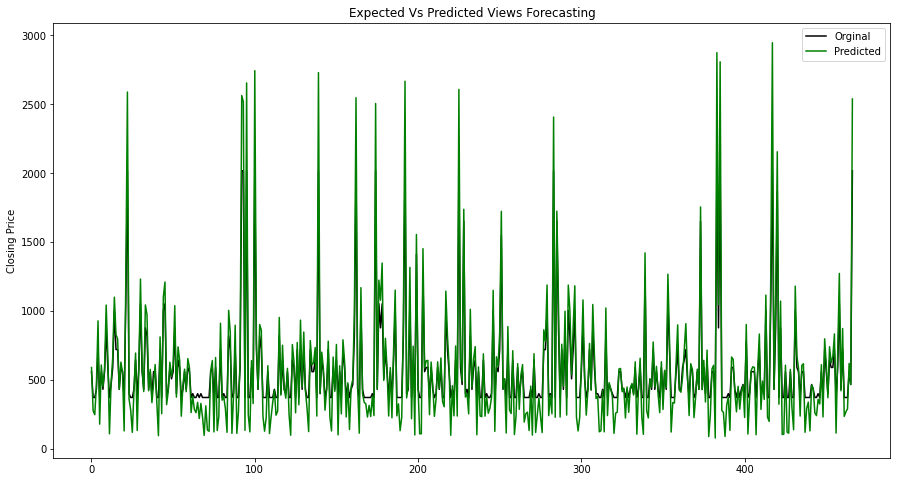

error= 20.5314203390407



In [ ]:
l2=[]
l3=[]
for i,model in zip(pipe_dict,pipelines):
  for j in range(len(X_test)):
    m = model.predict(X_test)
    error=((abs(Y_test[j]-m[j]))/Y_test[j])*100
    print('model:', pipe_dict[i],'=')
    print('Expected value =',Y_test[j],'-------predicted value =',m[j],'-----------error = ',"{:.2f}".format(error),'%')
    l3=m
    l2=error
  plot.figure(figsize=(15, 8))
  test_day = [t for t in range(len(Y_test))]
  labels={'Orginal','Predicted'}
  plot.plot(test_day, l3, color= 'black')
  plot.plot(test_day, Y_test, color = 'green')
  plot.title('Expected Vs Predicted Views Forecasting')
  plot.ylabel('Closing Price')
  plot.legend(labels)
  plot.show()
  print('error=',np.array(error).mean())
  print